# Convolutional Neural Networks

In [4]:
!wget https://raw.githubusercontent.com/keivalya/Robo-AI-recorded/refs/heads/main/9%20Image%20Processing/Lenna.png

--2024-11-27 22:31:29--  https://raw.githubusercontent.com/keivalya/Robo-AI-recorded/refs/heads/main/9%20Image%20Processing/Lenna.png
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 473831 (463K) [image/png]
Saving to: ‘Lenna.png’

Lenna.png           100%[===================>] 462.73K  --.-KB/s    in 0.004s  

2024-11-27 22:31:29 (106 MB/s) - ‘Lenna.png’ saved [473831/473831]



In [6]:
# Convolutional Neural Networks (CNNs) Tutorial

# This notebook introduces CNNs, explains their building blocks, and explores modern computer vision applications
# such as YOLO and SAM. We'll cover the basics and advanced topics with coding examples.

# Import necessary libraries
import cv2
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

print("Libraries loaded successfully!")

Libraries loaded successfully!


## Section 1: What are Convolutional Neural Networks (CNNs)?

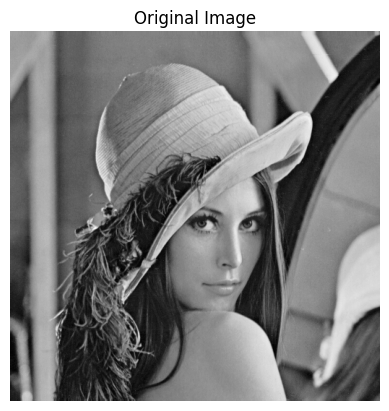

Image Matrix (Snippet):
[[169 169 168 167 169]
 [169 169 168 167 169]
 [169 169 168 167 169]
 [169 169 168 167 169]
 [169 169 168 167 169]]


In [4]:
# CNNs are specialized neural networks for processing images.
# The key operation in CNNs is convolution, which detects patterns like edges or textures.

# Load a sample image
image = cv2.imread("/content/Lenna.png", cv2.IMREAD_GRAYSCALE)  # Replace with your image
plt.imshow(image, cmap="gray")
plt.title("Original Image")
plt.axis("off")
plt.show()

# Explore the image matrix
print("Image Matrix (Snippet):")
print(image[:5, :5])

## Section 2: Convolution Operation

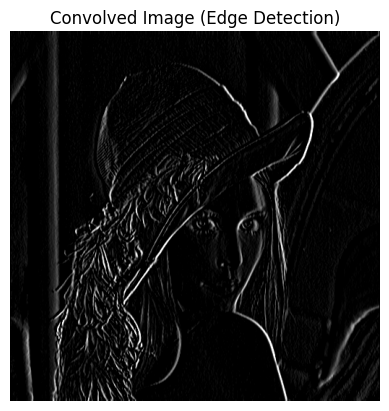

In [5]:
# Perform a convolution operation with an edge-detection filter

# Define an edge-detection kernel
kernel = np.array([[1, 0, -1], [1, 0, -1], [1, 0, -1]], dtype="float32")

# Apply the kernel using OpenCV
convolved = cv2.filter2D(image, -1, kernel)

# Display the result
plt.imshow(convolved, cmap="gray")
plt.title("Convolved Image (Edge Detection)")
plt.axis("off")
plt.show()

## Section 3: Types of Convolutions (Strided, Dilated, and Padding)

In [6]:
# Example of padding and striding in convolution
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Model

# Define a simple CNN layer with padding and stride
input_layer = Input(shape=(28, 28, 1))
conv_layer = Conv2D(1, (3, 3), strides=(2, 2), padding="same")(input_layer)

# Model to summarize output shape
model = Model(inputs=input_layer, outputs=conv_layer)
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 28, 28, 1)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 14, 14, 1)           │              10 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 10 (40.00 B)

 Trainable params: 10 (40.00 B)

 Non-trainable params: 0 (0.00 B)

## Section 4: Pooling Layers

In [7]:
# Pooling layers downsample feature maps. We'll demonstrate max pooling.

# Define a max-pooling layer
input_layer = Input(shape=(28, 28, 1))
pooling_layer = MaxPooling2D(pool_size=(2, 2), strides=2)(input_layer)

# Model to summarize output shape
model = Model(inputs=input_layer, outputs=pooling_layer)
model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)           │ (None, 28, 28, 1)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 14, 14, 1)           │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

## Section 5: Building a CNN

In [8]:
# Build a simple CNN for image classification
model = Sequential([
    Conv2D(32, (3, 3), activation="relu", input_shape=(28, 28, 1)),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(128, activation="relu"),
    Dense(10, activation="softmax")  # 10 output classes
])

model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_1 (Conv2D)                    │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 5408)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         692,352 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 693,962 (2.65 MB)

 Trainable params: 693,962 (2.65 MB)

 Non-trainable params: 0 (0.00 B)

## Section 6: Hands-On: YOLO for Object Detection

In [11]:
# YOLO (You Only Look Once) for real-time object detection
!pip install ultralytics
from ultralytics import YOLO

# Load a pretrained YOLO model
model = YOLO("yolov8n.pt")  # Replace with your YOLO model version

# Perform object detection on an image
results = model("/content/Lenna.png", show=True)  # Replace with your image path

WARNING ⚠️ Environment does not support cv2.imshow() or PIL Image.show()


image 1/1 /content/Lenna.png: 640x640 1 person, 1 umbrella, 436.5ms
Speed: 22.2ms preprocess, 436.5ms inference, 30.5ms postprocess per image at shape (1, 3, 640, 640)


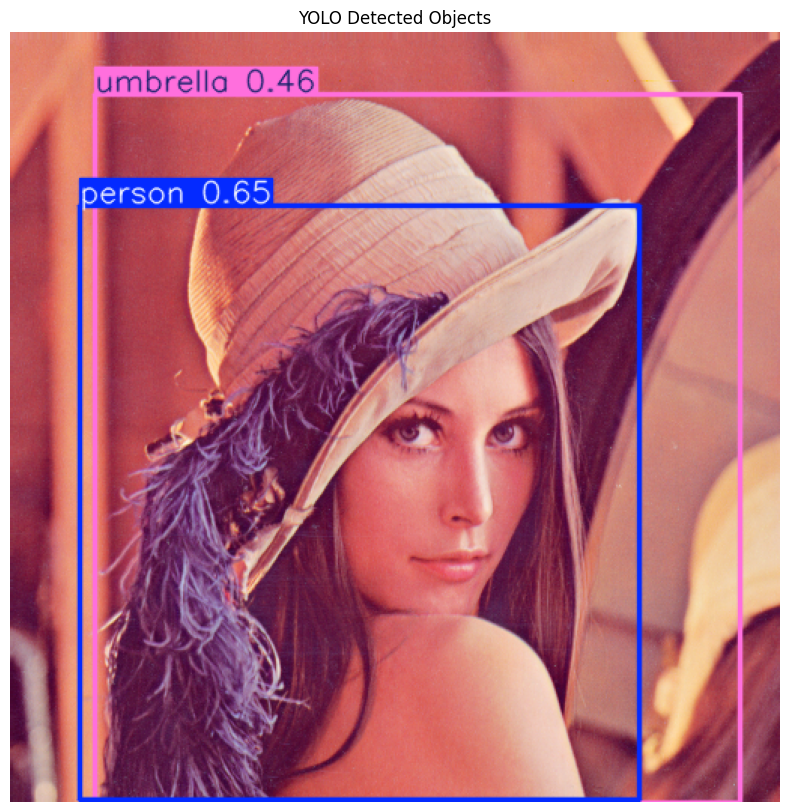

Class ID: 0, Confidence: 0.65, Box: (46.581199645996094, 115.618408203125, 418.7632751464844, 510.20831298828125)
Class ID: 25, Confidence: 0.46, Box: (56.569923400878906, 41.45659255981445, 485.1202087402344, 512.0)


In [13]:
# Extract results
image = cv2.imread("input.jpg")  # Load the input image
annotated_image = results[0].plot()  # Get the annotated image

# Display the annotated image
plt.figure(figsize=(10, 10))
plt.imshow(cv2.cvtColor(annotated_image, cv2.COLOR_BGR2RGB))
plt.title("YOLO Detected Objects")
plt.axis("off")
plt.show()

# Alternatively, list detected objects and their confidence scores
for result in results[0].boxes.data.tolist():
    x1, y1, x2, y2, confidence, class_id = result[:6]
    print(f"Class ID: {int(class_id)}, Confidence: {confidence:.2f}, Box: ({x1}, {y1}, {x2}, {y2})")

## Section 7: Hands-On: SAM (Segment Anything Model)

In [8]:
# Download the SAM Pretrained Weights
!wget https://dl.fbaipublicfiles.com/segment_anything/sam_vit_h_4b8939.pth # for vit_h (default)
!wget https://dl.fbaipublicfiles.com/segment_anything/sam_vit_b_01ec64.pth # for vit_b (base)

--2024-11-27 22:38:18--  https://dl.fbaipublicfiles.com/segment_anything/sam_vit_h_4b8939.pth
Resolving dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)... 108.157.254.15, 108.157.254.124, 108.157.254.121, ...
Connecting to dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)|108.157.254.15|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2564550879 (2.4G) [binary/octet-stream]
Saving to: ‘sam_vit_h_4b8939.pth’

sam_vit_h_4b8939.pt 100%[===================>]   2.39G  94.5MB/s    in 19s     

2024-11-27 22:38:36 (132 MB/s) - ‘sam_vit_h_4b8939.pth’ saved [2564550879/2564550879]



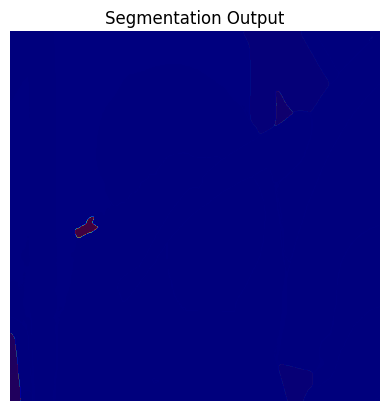

In [9]:
# Segment Anything Model (SAM) for image segmentation
!pip install segment-anything
from segment_anything import sam_model_registry, SamAutomaticMaskGenerator

# Load the pretrained SAM model
sam = sam_model_registry["vit_b"](checkpoint="/content/sam_vit_b_01ec64.pth")  # Path to SAM weights
# sam = sam_model_registry["vit_h"](checkpoint="/content/sam_vit_h_4b8939.pth")

# Create a mask generator
mask_generator = SamAutomaticMaskGenerator(sam)

# Generate masks for an image
image = cv2.imread("/content/Lenna.png")  # Replace with your image path
masks = mask_generator.generate(image)

# Visualize masks
plt.imshow(image)
for mask in masks:
    mask_image = mask["segmentation"]
    plt.imshow(mask_image, cmap="jet", alpha=0.5)
plt.title("Segmentation Output")
plt.axis("off")
plt.show()

## Section 8: Practical Project: MNIST Classification with CNN

In [11]:
# Define a CNN for digit classification on the MNIST dataset

from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

# Load MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.reshape(-1, 28, 28, 1) / 255.0  # Normalize and add channel dimension
x_test = x_test.reshape(-1, 28, 28, 1) / 255.0
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Build the model
model = Sequential([
    Conv2D(32, (3, 3), activation="relu", input_shape=(28, 28, 1)),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(128, activation="relu"),
    Dense(10, activation="softmax")
])

model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

# Train the model
model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=5)

# Evaluate the model
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {test_accuracy:.2f}")

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.9141 - loss: 0.2877 - val_accuracy: 0.9812 - val_loss: 0.0557
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9843 - loss: 0.0533 - val_accuracy: 0.9848 - val_loss: 0.0430
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.9907 - loss: 0.0307 - val_accuracy: 0.9856 - val_loss: 0.0419
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.9939 - loss: 0.0188 - val_accuracy: 0.9875 - val_loss: 0.0416
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9953 - loss: 0.0142 - val_accuracy: 0.9850 - val_loss: 0.0463
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9831 - loss: 0.0519
Test Accuracy: 0.99


313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


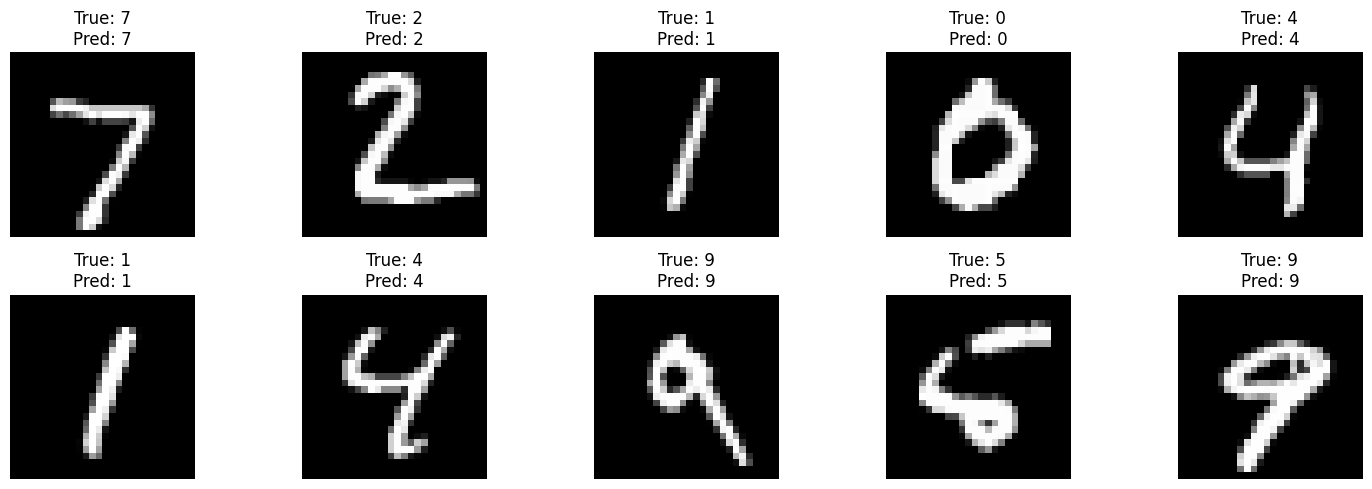

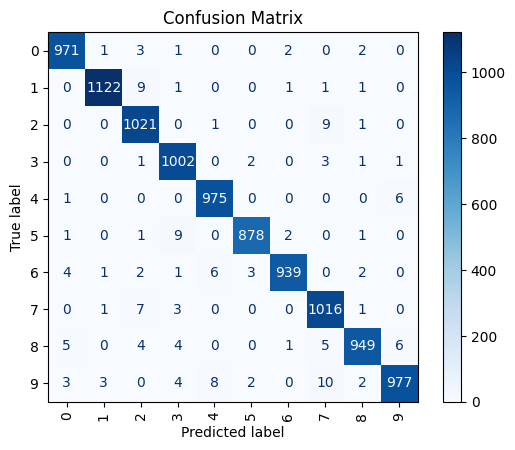

In [20]:
import matplotlib.pyplot as plt
import numpy as np

# Evaluate model performance on test data
predictions = model.predict(x_test)
predicted_classes = np.argmax(predictions, axis=1)
true_classes = np.argmax(y_test, axis=1)

# 1. Display a few test images with their predictions and true labels
def display_predictions(images, true_labels, predicted_labels, num=10):
    plt.figure(figsize=(15, 5))
    for i in range(num):
        plt.subplot(2, 5, i + 1)
        plt.imshow(images[i].reshape(28, 28), cmap="gray")
        plt.title(f"True: {true_labels[i]}\nPred: {predicted_labels[i]}")
        plt.axis("off")
    plt.tight_layout()
    plt.show()

# Display 10 predictions
display_predictions(x_test[:10], true_classes[:10], predicted_classes[:10])

# 3. Calculate and display the confusion matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

conf_matrix = confusion_matrix(true_classes, predicted_classes)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=np.arange(10))

disp.plot(cmap="Blues", xticks_rotation="vertical")
plt.title("Confusion Matrix")
plt.show()